In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sns

import pathlib
from sklearn.model_selection import train_test_split

In [2]:
data_dir = 'datasets'
# data_dir

In [3]:
data_dir = pathlib.Path(data_dir)
# data_dir

In [4]:
# list(data_dir.glob('*/*.png'))[:5]

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
# print(image_count)

In [6]:
ripes = list(data_dir.glob('ripe/*png'))
# ripes[:5]

In [7]:
durian_heatmap_dict = {
  'ripe' : list(data_dir.glob('ripe/*')),
   'unripe' : list(data_dir.glob('unripe/*')),
}

durian_labels_dict = {
    'ripe' : 0,
    'unripe' : 1
}

In [8]:
durian_heatmap_dict['ripe'][:5]

[WindowsPath('datasets/ripe/heatmap_10_percobaan_1.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_2.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_3.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_4.png'),
 WindowsPath('datasets/ripe/heatmap_10_percobaan_5.png')]

In [9]:
str(durian_heatmap_dict['ripe'][0])

'datasets\\ripe\\heatmap_10_percobaan_1.png'

In [10]:
img = cv2.imread(str(durian_heatmap_dict['ripe'][0]))
resized_img = cv2.resize(img,(200,200))
resized_img.shape

(200, 200, 3)

In [11]:
X, y = [], []

output_folder = "resized_images"

for durian_ripeness, images in durian_heatmap_dict.items():
    for index, image in enumerate(images):
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X.append(resized_img)
        y.append(durian_labels_dict[durian_ripeness])
        
        # Uncomment if you want to check all the resized images
        # output_name = f"{durian_ripeness}_{index}.jpg"
        # output_path = os.path.join(output_folder, output_name)
        # cv2.imwrite(output_path, resized_img)

In [12]:
X = np.array(X)
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train / 255
X_test = X_test / 255

In [13]:
convDim = 3
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (convDim,convDim), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 156816)            0         
                                                                 
 dense (Dense)               (None, 8)                 1254536   
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1254993 (4.79 MB)
Trainable params: 1254993 (4.79 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [14]:
EPOCH = 50
BATCH_SIZE = 32
model_fit = model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_test, y_test), batch_size=BATCH_SIZE) 

Epoch 1/50
2/2 [==============================] - 3s 621ms/step - loss: 1.2448 - accuracy: 0.4464 - val_loss: 1.8937 - val_accuracy: 0.3684
Epoch 2/50
2/2 [==============================] - 1s 523ms/step - loss: 0.9105 - accuracy: 0.5893 - val_loss: 0.5710 - val_accuracy: 0.4737
Epoch 3/50
2/2 [==============================] - 1s 469ms/step - loss: 0.5018 - accuracy: 0.7500 - val_loss: 0.6020 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 1s 472ms/step - loss: 0.5228 - accuracy: 0.8750 - val_loss: 0.5263 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 1s 563ms/step - loss: 0.4242 - accuracy: 1.0000 - val_loss: 0.5362 - val_accuracy: 0.5263
Epoch 6/50
2/2 [==============================] - 1s 480ms/step - loss: 0.3882 - accuracy: 0.6786 - val_loss: 0.6313 - val_accuracy: 0.4211
Epoch 7/50
2/2 [==============================] - 1s 512ms/step - loss: 0.4191 - accuracy: 0.6250 - val_loss: 0.6044 - val_accuracy: 0.4737
Epoch 8/50
2/2 [====

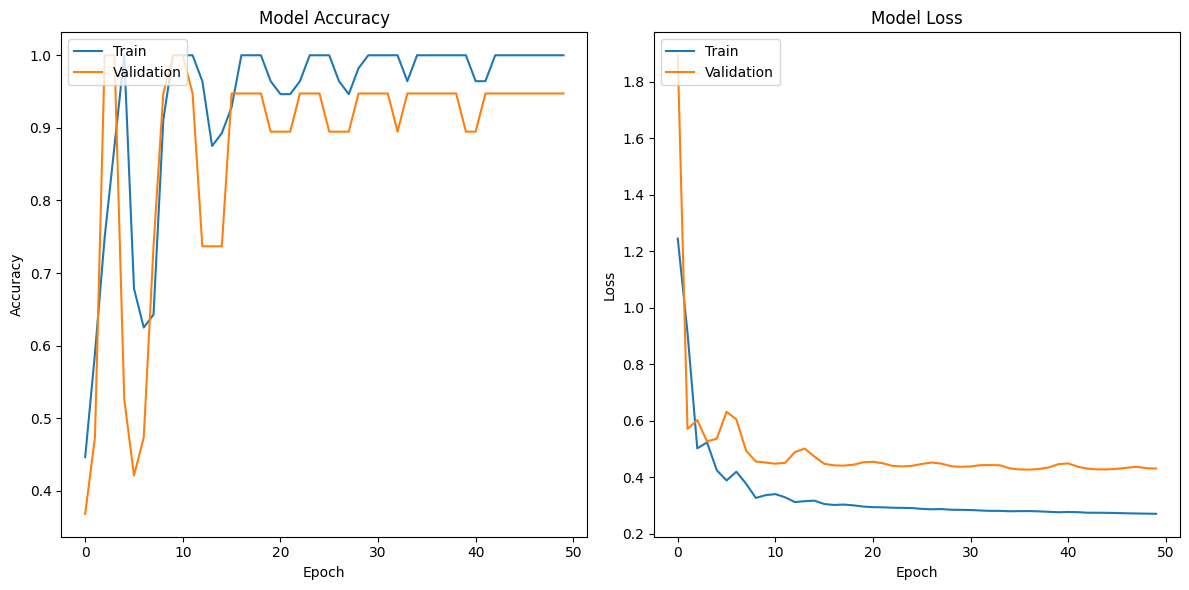

In [19]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])  # Add validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

1/1 - 0s - loss: 0.4304 - accuracy: 0.9474 - 72ms/epoch - 72ms/step
0.9473684430122375


1/1 [==============================] - 0s 75ms/step


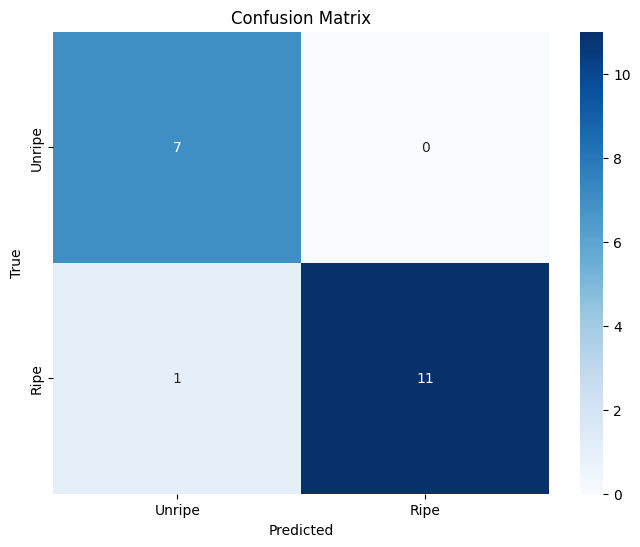

In [21]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming it's a binary classification problem

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
# save model to .keras file
# model.save("saved model/Conv5-Gas.h5")``